In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
df= pd.read_csv('/content/drive/MyDrive/PJ/csv/tipos/Mango.csv')

Mounted at /content/drive


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4154 entries, 0 to 4153
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   cliente         4154 non-null   object 
 1   precio_venta    4112 non-null   float64
 2   peso            4154 non-null   float64
 3   t_id            4154 non-null   object 
 4   fecha_venta     4140 non-null   object 
 5   hora_venta      4140 non-null   object 
 6   tipo            4154 non-null   object 
 7   fecha_recogida  4154 non-null   object 
 8   hora_recogida   4154 non-null   object 
 9   lote            4154 non-null   object 
 10  marca           4154 non-null   object 
 11  coste_inicial   4033 non-null   float64
 12  proveedor       4154 non-null   object 
dtypes: float64(3), object(10)
memory usage: 422.0+ KB


In [ ]:
print(df.describe())

       precio_venta         peso  coste_inicial
count   4112.000000  4154.000000    4033.000000
mean       3.497324   300.196582       2.006532
std        0.708759   100.700068       0.499837
min        1.367207   -55.126755       0.159395
25%        3.035160   231.731197       1.669697
50%        3.472769   301.513661       2.001971
75%        3.982554   369.672144       2.345790
max        5.728274   622.972774       3.873056


In [ ]:
print(df.head())

         cliente  precio_venta        peso             t_id fecha_venta  \
0  CompraMaestra      4.799882  320.867132     Mango001.png  2022/09/12   
1  CompraMaestra      3.365374  394.262626  Mango001078.png  2022/09/18   
2  CompraMaestra      2.563931  442.226081  Mango001106.png  2022/08/31   
3  CompraMaestra      2.546967  486.226816  Mango001108.png  2022/09/30   
4  CompraMaestra      3.329551  177.921412   Mango00112.png  2022/09/02   

  hora_venta   tipo fecha_recogida hora_recogida                    lote  \
0      07:00  Mango     2022/09/12         00:00      S65T71U48L49J80T71   
1      07:00  Mango     2022/09/18         00:00  S65T71U48L49L55T46V78M   
2      23:00  Mango     2022/09/26         04:00  S65T71U48L49M48R46V78M   
3      17:00  Mango     2022/09/30         10:00  S65T71U48L49M48T46V78M   
4      21:00  Mango     2022/09/02         17:00   S65T71U48L49M50J80T71   

              marca  coste_inicial                     proveedor  
0    AventuraFrutal      

In [ ]:
df['coste_inicial'] = df['coste_inicial'].round(2)
df['peso'] = df['peso'].round(2)
df['precio_venta'] = df['precio_venta'].round(2)

df.head()

# **PESO**

Empezamos analizando los PESOS

In [ ]:
peso_minimo = df["peso"].min()
peso_maximo = df["peso"].max()
negativos = df[df["peso"] < 0]
nulos = df[df["peso"].isnull()]

print(f"Peso mínimo: {peso_minimo}")
print(f"Peso máximo: {peso_maximo}")
print(f"Total negativos: {len(negativos)}")
print(f"Total nulos: {len(nulos)}")

Peso mínimo: -55.12675480499263
Peso máximo: 622.9727743705255
Total negativos: 6
Total nulos: 0


In [ ]:
df[df["peso"] < 0]["marca"].value_counts()


,count
marca,
SaborNativo,2
ExquisitoJardín,1
PlacerFrutado,1
DeliciosoEdén,1
DulzuraSilvestre,1


In [ ]:
df[df["peso"] < 0]["proveedor"].value_counts()

,count
proveedor,
EcoFungicidas Morales,1
Ganadería Orgánica TierraFértil,1
Reforestación Ecológica VerdeVida,1
AgroSoftware Soluciones,1
Fertilizantes Naturales del Valle,1
Agronutrientes del Futuro,1


In [ ]:
df[df["peso"] < 0]["lote"].unique()

array(['S65T71U48L50S53M46V78M', 'S65T71U48L50O56R46V78M',
       'S65T71U48L52M51M46V78M', 'S65T71U48L50L48J80T71',
       'S65T71U48L54L46V78M', 'S65T71U48L51N52T46V78M'], dtype=object)

Revisamos si es una marca o proveedor en específico que tiene negativos pero resultan ser los lotes S65T71U48L.

In [ ]:
print(negativos["peso"])

622    -17.905145
2363   -30.840015
3003   -27.930211
3427   -29.052492
3491   -15.458374
3693   -55.126755
Name: peso, dtype: float64


Para la poca cantidad que son los eliminamos, no tienen sentido tampoco en positivo.

In [ ]:
filas_peso_negativo = df[df["peso"] < 0]
print(filas_peso_negativo)

                         cliente  precio_venta       peso             t_id  \
622               Tienda Selecta      2.840488 -17.905145  Mango002751.png   
2363      Distribuciones del Sol      3.679946 -30.840015  Mango002386.png   
3003      Distribuidora Nacional      3.271089 -27.930211  Mango004131.png   
3427  Central de Abastos Central      2.627415 -29.052492   Mango00200.png   
3491  Central de Abastos Central      4.233552 -15.458374    Mango0060.png   
3693          Distribuidora Alfa      2.370897 -55.126755  Mango003248.png   

     fecha_venta hora_venta   tipo fecha_recogida hora_recogida  \
622   2022/09/11      15:00  Mango     2022/09/11         07:00   
2363  2022/09/25      21:00  Mango     2022/09/25         11:00   
3003  2022/09/02      00:00  Mango     2022/09/01         16:00   
3427  2022/09/15      16:00  Mango     2022/09/15         07:00   
3491  2022/09/28      04:00  Mango     2022/09/27         21:00   
3693  2022/09/25      21:00  Mango     2022/09/25  

Reemplazamos todos los valores negativos por NaN


In [ ]:
df["peso"] = df["peso"].mask(df["peso"] < 0)

In [ ]:
print("Cantidad de pesos mayores de 450 g:", len(df[df['peso'] > 450]))
print("Peso máximo:", df.loc[df['peso'] > 450, 'peso'].max())

Cantidad de pesos mayores de 450 g: 271
Peso máximo: 622.9727743705255


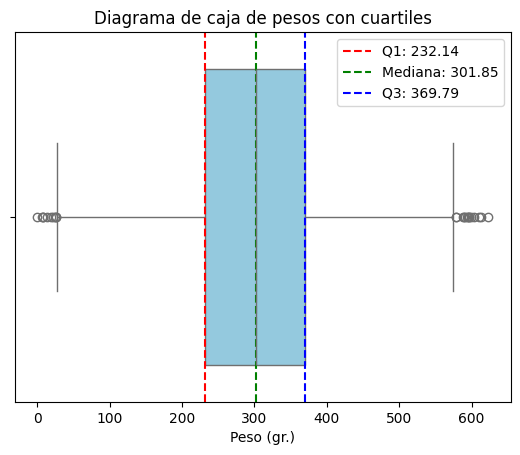

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

costes = df["peso"].dropna()


q1 = costes.quantile(0.25)
q2 = costes.quantile(0.50)
q3 = costes.quantile(0.75)

sns.boxplot(x=costes, orient='h', color='skyblue')

plt.axvline(q1, color='red', linestyle='--', label=f'Q1: {q1:.2f}')
plt.axvline(q2, color='green', linestyle='--', label=f'Mediana: {q2:.2f}')
plt.axvline(q3, color='blue', linestyle='--', label=f'Q3: {q3:.2f}')

plt.title('Diagrama de caja de pesos con cuartiles')
plt.xlabel('Peso (gr.)')
plt.legend()

plt.show()

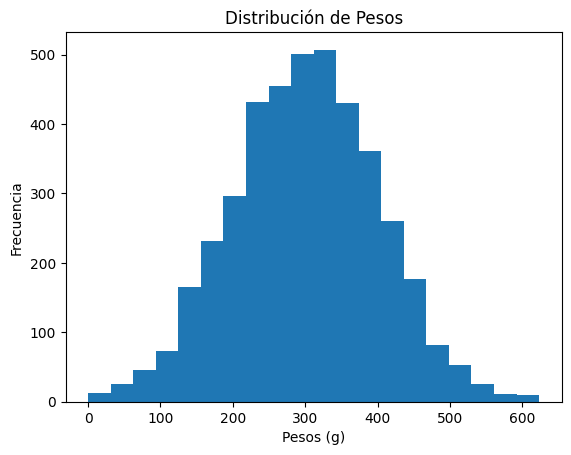

In [ ]:
import matplotlib.pyplot as plt

plt.hist(df["peso"].dropna(), bins=20)
plt.title('Distribución de Pesos')
plt.xlabel('Pesos (g)')
plt.ylabel('Frecuencia')
plt.show()

In [ ]:
Q1_pe = df["peso"].quantile(0.25)
Q3_pe = df["peso"].quantile(0.75)
IQR_pe = Q3_pe - Q1_pe
outliers_pe = df[df["peso"] > Q3_pe + 1.5 * IQR_pe]

print("Total outliers:", outliers_pe["peso"].count())
print(Q1_pe)
print(Q3_pe)
print(IQR_pe)

Total outliers: 14
232.13976366712018
369.79055140127105
137.65078773415087


In [ ]:
print(df[['peso', 't_id']].dropna(subset=['peso']).sort_values(by='peso'))

            peso             t_id
3432    0.206690  Mango002343.png
1751    6.426312  Mango002971.png
1816    7.354284   Mango00896.png
530     7.453334  Mango003702.png
1826   12.915643  Mango001246.png
...          ...              ...
577   599.123027    Mango0014.png
3084  602.958855  Mango002850.png
1396  610.426829  Mango003731.png
3450  612.496439  Mango002795.png
2286  622.972774  Mango003862.png

[4148 rows x 2 columns]


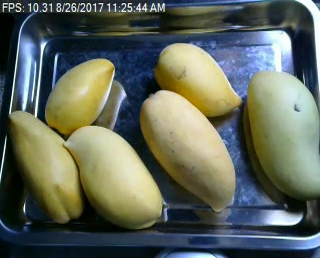

In [ ]:
from IPython.display import Image, display

image_path = '/content/drive/MyDrive/PJ/archive/Mango/Mango003702.png'

try:
    display(Image(filename=image_path))
except FileNotFoundError:
    print(f"Error: No se encontró el archivo en la ruta {image_path}. Por favor, verifica la ruta de tu imagen.")
except Exception as e:
    print(f"Ocurrió un error al cargar la imagen: {e}")

En la imagen anterior tenemos una imagen con 6 mangos y un peso de 7.453334 gr.

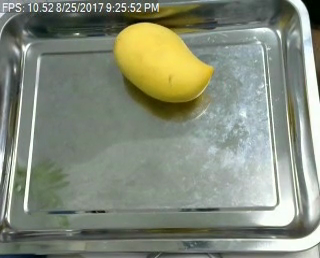

In [ ]:
from IPython.display import Image, display

image_path = '/content/drive/MyDrive/PJ/archive/Mango/Mango002795.png'

try:
    display(Image(filename=image_path))
except FileNotFoundError:
    print(f"Error: No se encontró el archivo en la ruta {image_path}. Por favor, verifica la ruta de tu imagen.")
except Exception as e:
    print(f"Ocurrió un error al cargar la imagen: {e}")

En esta imagen tenemos un solo mango y un peso de 612.496439 gr.

El peso medio de un mango depende de su variedad pero teniendo en cuenta todas ellas oscila entre 150 y 400 gramos.

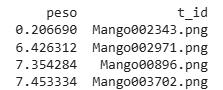

En todas estas imagenes tenemos un peso imposible para ser de este tipo de fruta y además todas muestran más de un mango en sus imagenes.

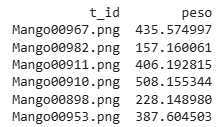

En estas imagenes solamente se muestra un mango y los pesos son muy superiores a las anteriormente mostradas.


Dejo los pesos aquí y veremos más adelante. Empiezo con coste inicial.


# **COSTE INICIAL**

In [ ]:
coste_inicial_min = df["coste_inicial"].min()
coste_inicial_max = df["coste_inicial"].max()
negativos_coste = df[df["coste_inicial"] < 0]
nulos_coste = df[df["coste_inicial"].isnull()]

print(f"Coste inicial mínimo: {coste_inicial_min}")
print(f"Coste inicial máximo: {coste_inicial_max}")
print(f"Coste inicial negativos: {len(negativos_coste)}")
print(f"Coste inicial nulos: {len(nulos_coste)}")

Coste inicial mínimo: 0.1593945765226563
Coste inicial máximo: 3.8730560311119135
Coste inicial negativos: 0
Coste inicial nulos: 121


No encontramos negativos y los costes iniciales van desde los 0.15 hasta los 3.87


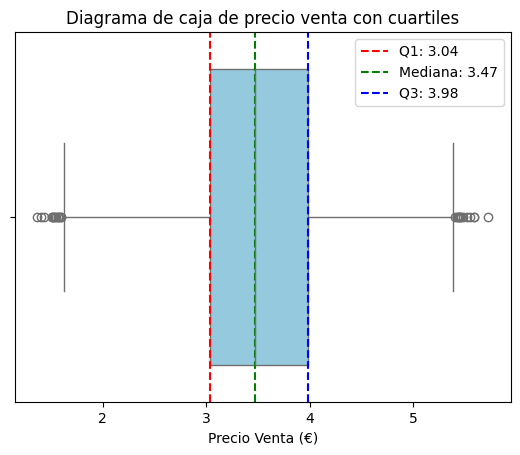

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

costes = df["precio_venta"].dropna()


q1 = costes.quantile(0.25)
q2 = costes.quantile(0.50)
q3 = costes.quantile(0.75)

sns.boxplot(x=costes, orient='h', color='skyblue')

plt.axvline(q1, color='red', linestyle='--', label=f'Q1: {q1:.2f}')
plt.axvline(q2, color='green', linestyle='--', label=f'Mediana: {q2:.2f}')
plt.axvline(q3, color='blue', linestyle='--', label=f'Q3: {q3:.2f}')

plt.title('Diagrama de caja de precio venta con cuartiles')
plt.xlabel('Precio Venta (€)')
plt.legend()

plt.show()

En el gráfico se ven muchos outliers. Vamos a ver en otro gráfico como visualizamos los datos.

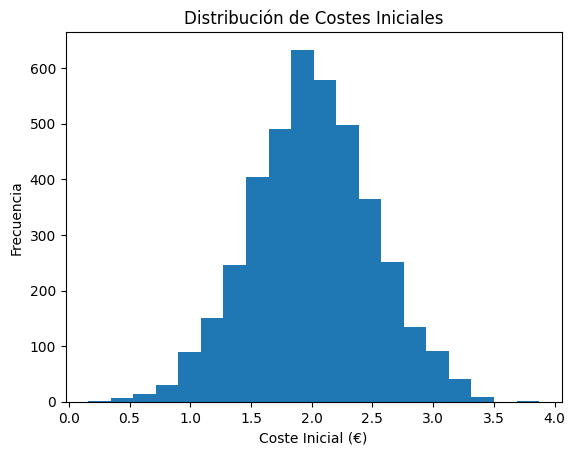

In [ ]:
import matplotlib.pyplot as plt

plt.hist(df["coste_inicial"].dropna(), bins=20)
plt.title('Distribución de Costes Iniciales')
plt.xlabel('Coste Inicial (€)')
plt.ylabel('Frecuencia')
plt.show()

In [ ]:
Q1_ci = df["coste_inicial"].quantile(0.25)
Q3_ci = df["coste_inicial"].quantile(0.75)
IQR_ci = Q3_ci - Q1_ci
outliers_ci = df[df["coste_inicial"] > Q3_ci + 1.5 * IQR_ci]

print("Total outliers:", outliers_ci["coste_inicial"].count())
print(Q1_ci)
print(Q3_ci)
print(IQR_ci)

Total outliers: 6
1.6696972025090544
2.3457900314472035
0.6760928289381491


Una vez analizados los costes iniciales y viendo que tenemos 6 outliers y el resto de costes se mueven en la media deben de ser excepciones por algún motivo de calidad, tamaño o imperfecciones de la fruta.

Pasamos a analizar los precios de venta:

# **PRECIO VENTA**

In [ ]:
peso_minimo_pv = df["precio_venta"].min()
peso_maximo_pv = df["precio_venta"].max()
negativos_pv = df[df["precio_venta"] < 0]
nulos_pv = df[df["precio_venta"].isnull()]

print(f"Precio venta mínimo: {peso_minimo_pv}")
print(f"Precio venta máximo: {peso_maximo_pv}")
print(f"Total negativos: {len(negativos_pv)}")
print(f"Total nulos: {len(nulos_pv)}")

Precio venta mínimo: 1.36720691542709
Precio venta máximo: 5.728273870099348
Total negativos: 0
Total nulos: 42


Sabemos que las frutas que no tienen datos de venta es fruta que no ha podido ser vendida porque ha sido dañada durante la distribución. Vamos a comprobar si tienen fecha de venta.

In [ ]:
display(nulos_pv[nulos_pv["fecha_venta"].isnull()])

,cliente,precio_venta,peso,t_id,fecha_venta,hora_venta,tipo,fecha_recogida,hora_recogida,lote,marca,coste_inicial,proveedor


Ninguno de los 42 nulos es un producto dañado y que, por lo tanto, no ha sido vendido. Se ha sufrido una perdida de información o esta información no ha sido registrada correctamente.

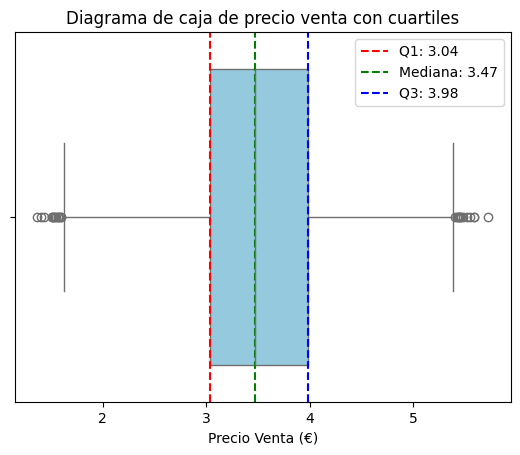

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

costes = df["precio_venta"].dropna()


q1 = costes.quantile(0.25)
q2 = costes.quantile(0.50)
q3 = costes.quantile(0.75)

sns.boxplot(x=costes, orient='h', color='skyblue')

plt.axvline(q1, color='red', linestyle='--', label=f'Q1: {q1:.2f}')
plt.axvline(q2, color='green', linestyle='--', label=f'Mediana: {q2:.2f}')
plt.axvline(q3, color='blue', linestyle='--', label=f'Q3: {q3:.2f}')

plt.title('Diagrama de caja de precio venta con cuartiles')
plt.xlabel('Precio Venta (€)')
plt.legend()

plt.show()

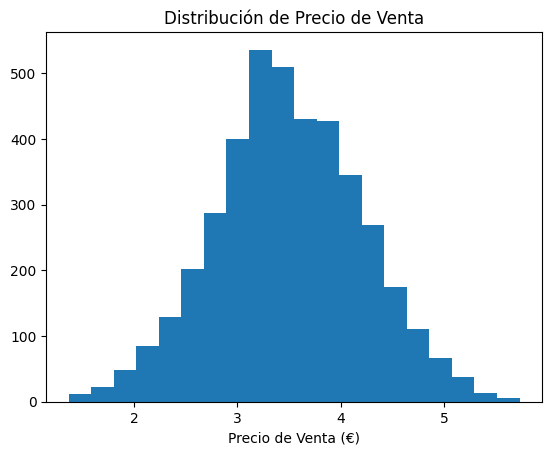

In [ ]:
import matplotlib.pyplot as plt

plt.hist(df["precio_venta"].dropna(), bins=20)
plt.title('Distribución de Precio de Venta')
plt.xlabel('Precio de Venta (€)')
plt.ylabel('')
plt.show()

In [ ]:
Q1_pv = df["precio_venta"].quantile(0.25)
Q3_pv = df["precio_venta"].quantile(0.75)
IQR_pv = Q3_pv - Q1_pv
outliers_pv = df[df["precio_venta"] > Q3_pv + 1.5 * IQR_pv]

print("Total outliers:", outliers_pv["precio_venta"].count())
print(Q1_pv)
print(Q3_pv)
print(IQR_pv)

Total outliers: 13
3.0351602485400107
3.982554149103271
0.9473939005632603


En precio venta tenemos 13 outliers mientras que en coste inicial teníamos 6.

In [ ]:
outliers_pv_ci = pd.merge(outliers_ci, outliers_pv, on='t_id', how='inner')
outliers_pv_ci

,cliente_x,precio_venta_x,peso_x,t_id,fecha_venta_x,hora_venta_x,tipo_x,fecha_recogida_x,hora_recogida_x,lote_x,...,peso_y,fecha_venta_y,hora_venta_y,tipo_y,fecha_recogida_y,hora_recogida_y,lote_y,marca_y,coste_inicial_y,proveedor_y
0,SuperMercado Ideal,5.594648,300.105701,Mango001173.png,2022/09/19,07:00,Mango,2022/09/19,01:00,S65T71U48L49M55O46V78M,...,300.105701,2022/09/19,07:00,Mango,2022/09/19,01:00,S65T71U48L49M55O46V78M,AventuraFrutal,3.472379,Insecticidas Ecológicos Reyes


1 coincide.

Vamos a comprobar la norma que tenemos que cumplir que desde día de recogida hasta fecha venta tiene que pasar al menos un día.

In [ ]:
df['fecha_venta'] = pd.to_datetime(df['fecha_venta'], errors='coerce')
df['fecha_recogida'] = pd.to_datetime(df['fecha_recogida'], errors='coerce')

tiempo_diferencia = df['fecha_venta'] - df['fecha_recogida']

al_menos_un_dia = (tiempo_diferencia >= pd.Timedelta(days=1)).all()

print(f"Es verdad que desde fecha_recogida y fecha_venta pasa al menos un día? {al_menos_un_dia}")

Es verdad que desde fecha_recogida y fecha_venta pasa al menos un día? False


In [ ]:
tiempo_diferencia.min()

Timedelta('-26 days +00:00:00')

In [ ]:
tiempo_diferencia.sort_values()

,0
2,-26 days
3461,-26 days
1313,-26 days
1852,-25 days
2705,-24 days
...,...
3196,NaT
3267,NaT
3679,NaT
3691,NaT


Nos encontramos con datos negativos.
Sabemos que no se pueden realizar reservas antes de la recogida por lo que es un error y la norma no se cumple.

**No en todos los productos pasan 24 horas mínimo desde la recogida hasta la venta.**

El peso está en gramos. Vamos a comprobar si a cada proveedor no se le venden más de 100Kg de fruta en un solo día.

In [ ]:
venta_dia = df.groupby(['proveedor', 'fecha_venta'])['peso'].sum()

mayor_100kg = (venta_dia > 100000).any()

print(f"¿Algún proveedor recibe más de 100 kg en un solo día? {mayor_100kg}")

¿Algún proveedor recibe más de 100 kg en un solo día? False


No se le vende más de 100Kg de mangos a un proveedor en un solo día.

**En el caso de los mangos esta norma se cumple.**

Vamos a comprobar que 1 lote solo contiene un tipo de fruta y de una sola marca.

In [ ]:
lote_check = df.groupby('lote').agg({
    'tipo': 'nunique',
    'marca': 'nunique'
}).reset_index()

tipo_check = lote_check[lote_check['tipo'] > 1]
marca_check = lote_check[lote_check['marca'] > 1]

if tipo_check.empty and marca_check.empty:
    print("Cada lote solo contiene un tipo de fruta o una marca.")
else:
    print("Norma incumplida:")
    if not tipo_check.empty:
        print("\nLotes con más de un tipo de fruta:")
        display(tipo_check)
    if not marca_check.empty:
        print("\nLotes con más de una marca:")
        display(marca_check)

Cada lote solo contiene un tipo de fruta o una marca.


En un solo lote con los mangos no encontramos más de un tipo de fruta ni más de una marca.

**Con los mangos esta norma se cumple.**

In [ ]:
df = df.dropna(subset=['coste_inicial', 'precio_venta'])
df = df[df['coste_inicial'] != 0]
df['rentabilidad'] = ((df['precio_venta'] - df['coste_inicial']) / df['coste_inicial']) * 100

df_lote = df.groupby('lote', as_index=False)[['coste_inicial', 'precio_venta', 'rentabilidad']].mean()

corr = df_lote[['coste_inicial', 'precio_venta', 'rentabilidad']].corr()
display(corr)

,coste_inicial,precio_venta,rentabilidad
coste_inicial,1.000000,0.700457,-0.559130
precio_venta,0.700457,1.000000,0.050428
rentabilidad,-0.559130,0.050428,1.000000


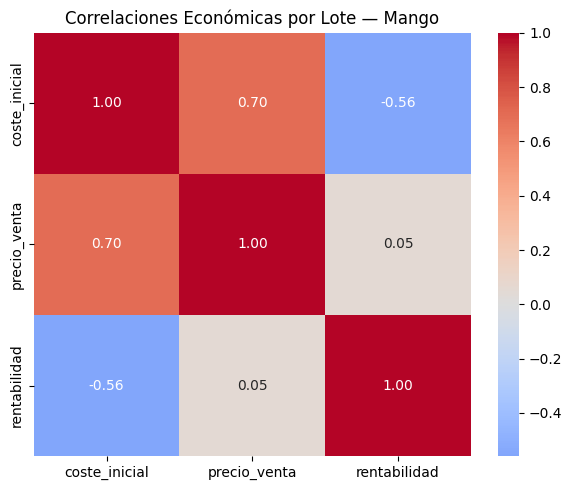

In [ ]:
plt.figure(figsize=(6,5))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0, fmt=".2f")
plt.title('Correlaciones Económicas por Lote — Mango')
plt.tight_layout()
plt.show()

               precio_venta  coste_inicial      peso
precio_venta       1.000000       0.700457 -0.003471
coste_inicial      0.700457       1.000000 -0.006998
peso              -0.003471      -0.006998  1.000000


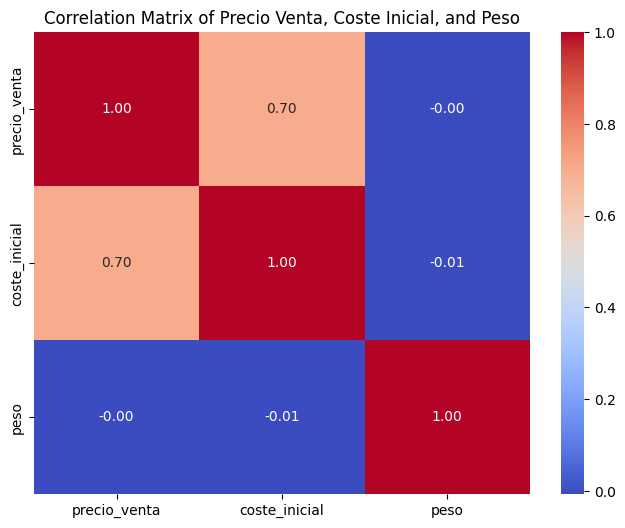

In [ ]:
correlation_matrix = df[['precio_venta', 'coste_inicial', 'peso']].corr()

print(correlation_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Precio Venta, Coste Inicial, and Peso')
plt.show()

Las correlaciones entre coste inicial y precio venta son de 0.70 mientras que no encontramos correlación entre precio venta y peso ni entre coste inicial y peso. Creemos que esto debería estar totalmente relacionado ya que a mayor peso deberia tener un coste o precio mayor. Esto refuerza la teoria que exponemos de que los pesos no son correctos.

Aqui dejamos el analisis de los mangos y pasamos a analizar la siguiente fruta.